# **Exp** - **2** : **Delta** **Modulation**
# **Register** **Number** : **212224060241**
# **Name** : **Selshiya** **F**

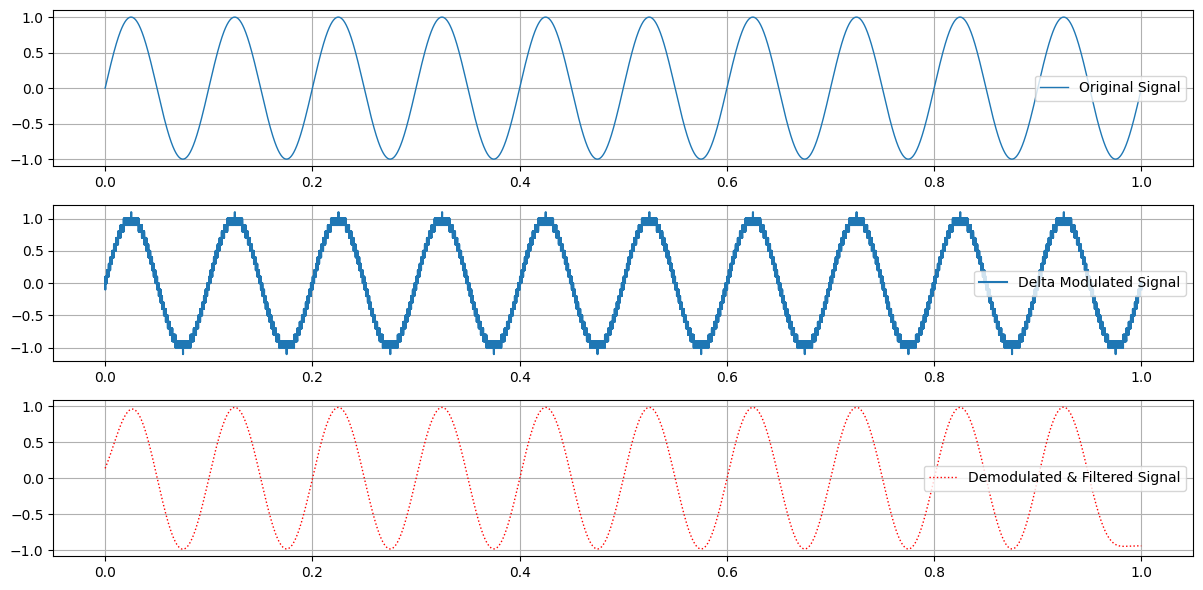

In [8]:
#Delta Modulation
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
# Parameters
fs = 10000  # Sampling frequency
f = 10  # Signal frequency
T = 1  # Duration in seconds
delta = 0.1  # Step size
t = np.arange(0, T, 1/fs)
message_signal = np.sin(2 * np.pi * f * t)  # Sine wave as input signal
# Delta Modulation Encoding
encoded_signal = []
dm_output = [0]  # Initial value of the modulated signal
prev_sample = 0
for sample in message_signal:
    if sample > prev_sample:
        encoded_signal.append(1)
        dm_output.append(prev_sample + delta)
    else:
        encoded_signal.append(0)
        dm_output.append(prev_sample - delta)
    prev_sample = dm_output[-1]
# Delta Demodulation (Reconstruction)
demodulated_signal = [0]
for bit in encoded_signal:
    if bit == 1:
        demodulated_signal.append(demodulated_signal[-1] + delta)
    else:
        demodulated_signal.append(demodulated_signal[-1] - delta)
# Convert to numpy array
demodulated_signal = np.array(demodulated_signal)
# Apply a low-pass Butterworth filter
def low_pass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)
filtered_signal = low_pass_filter(demodulated_signal, cutoff_freq=20, fs=fs)
# Plotting the Results

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, message_signal, label='Original Signal', linewidth=1)
plt.legend()
plt.grid()
plt.subplot(3, 1, 2)
plt.step(t, dm_output[:-1], label='Delta Modulated Signal', where='mid')
plt.legend()
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal[:-1], label='Demodulated & Filtered Signal', linestyle='dotted', linewidth=1, color='r')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
